# Introduction to Data Science 2024 - Homework 3
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 2, 11:59pm.

In this homework you will read in and analyze a movies dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 


## Your Data
Fill out the following information: 

*First Name:* Chase   
*Last Name:*  Maughan 
*E-mail:* u0962361@umail.utah.edu
*UID:*  u0962361


In [18]:
# imports
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Analyzing Data The Basic Way

In this part we'll do some manual analysis of a movies dataset.

### Task 1.1: Read in the data

Parse the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "ratings" and the "votes" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, the number of rows and columns, and Row 50 of the table.

In [19]:
movies = []
header = []

with open('movies.csv', newline='') as csvfile:
    movie_file = csv.reader(csvfile)
    header = next(movie_file)

    for row in movie_file:
        row[header.index('rating')] = float(row[header.index('rating')])
        row[header.index('votes')] = int(row[header.index('votes')])
        movies.append(row)

print("Header:", header)

num_rows = len(movies)
num_columns = len(header)
print("Rows: " + str(num_rows))
print("Col: " + str(num_columns))

print("Row 50:", movies[49])

Header: ['', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']
Rows: 58788
Col: 25
Row 50: ['50', "'What's Your 'I.Q.'?' Number Two", '1940', '9', 'NA', 5.9, 9, '0', '0', '14.5', '14.5', '24.5', '24.5', '14.5', '0', '14.5', '14.5', '', '0', '0', '0', '0', '1', '0', '1']


### Task 1.2:  Calculate movie stats

In this task, you will calculate some statistics about movies. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell – you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calculate average rating
Compute the average rating for all movies and print the output and total.
Your output could look like this:
    
    Average rating: xxx.xxxx, Total movies: xx

#### Task 1.2.2: Calculate average rating for major movies

Compute the average rating for the movies that have more than 250 votes in your loaded dataset and print the output. (We'll call these movies with more than 250 votes *major movies* from now on).

Your output could look like this:
    
    Average rating for major movies: xxx.xxxx, Total major movies: xx

#### Task 1.2.3: Find the highest and the lowest rated major movies

Determine which major movie has the highest rating and which has the lowest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: MOVIE TITLE
    Lowest rating: xxx.xxxx, Title: MOVIE TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the rating relationship of major movies to all movies?
 * Are major movies typically better than the average of all movies?

In [114]:
movies_df = pd.DataFrame(movies)

average_rating = round(np.average(movies_df[5]),2)
total_movies = len(movies_df)

print(f"Average rating: {average_rating}, Total movies: {total_movies}" + '\n')

major_movies_df = movies_df[movies_df[6] > 250]

average_major_rating = round(np.average(major_movies_df[5]),2)
total_major_movies = len(major_movies_df)

print(f"Average major rating: {average_major_rating}, Total major movies: {total_major_movies}" + '\n')

sorted_mmd = major_movies_df.sort_values(by=5)
hightest_rating = sorted_mmd[5].values[-1]
lowest_rating = sorted_mmd[5].values[0]
highest_movie = sorted_mmd[1].values[-1]
lowest_movie = sorted_mmd[1].values[0]

print(f"Highest rating: {hightest_rating}, Title: {highest_movie}" + '\n')
print(f"Lowest rating: {lowest_rating}, Title: {lowest_movie}" + '\n')

print("What's the rating relationship of major movies to all movies?")
print("According to the data provided major movies are movies that recieve more than 250 votes."+ '\n' )
print("Are major movies typically better than the average of all movies?")
print("The average for major movies is higher than the average for all movies, that would imply that major movies are typically rated higher than less popular movies")

Average rating: 5.93, Total movies: 58788

Average major rating: 6.28, Total major movies: 9370

Highest rating: 9.3, Title: Mis

Lowest rating: 1.3, Title: Skydivers, The

What's the rating relationship of major movies to all movies?
According to the data provided major movies are movies that recieve more than 250 votes.

Are major movies typically better than the average of all movies?
The average for major movies is higher than the average for all movies, that would imply that major movies are typically rated higher than less popular movies


## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [129]:

file_path = 'movies.csv'
movies_df = pd.read_csv(file_path)

movies_df.head()


,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [130]:
print("number of rows in dataframe: ")
print(len(movies_df))
print("number of columns in dataframe: ")
print(len(movies_df.columns))

print("Of which data types are the columns?")
print("The columns are comprised of strings, ints, and floats")
print("Do you have to do manual data type conversions?")
print("not for dataframes")

number of rows in dataframe: 
58788
number of columns in dataframe: 
25
Of which data types are the columns?
The columns are comprised of strings, ints, and floats
Do you have to do manual data type conversions?
not for dataframes


### Task 2.2: Calculate the average rating

Compute the average rating for all movies and print the output and total.
Your output could look like this:
    
    Average rating: xxx.xxxx, Total movies: xx

In [131]:
average_rating = round(np.average(movies_df['rating']),2)
total_movies = len(movies_df)

print(f"Average rating: {average_rating}, Total movies: {total_movies}" + '\n')

Average rating: 5.93, Total movies: 58788



### Task 2.3: Which is computationally faster?

We want to measure how long it takes to calculate the average using [Pandas](http://pandas.pydata.org/pandas-docs/stable) versus using a for loop (you can copy the relevant parts from Task 1). This is a fast calculation, so running once is not enough. Instead, run both calcuations 500 times (in a loop) and measure the time for the entire loop.

To measure, use [time.process_time()](https://docs.python.org/3/library/time.html#time.process_time) to collect timestamps before and after the loop. The total time is the difference between those timestamps.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
    Time the Part 1 way: xxx.xxx s  
    Time using Pandas: xxx.xxx s  
    Difference factor: xxx
    
Interpret the results. Is this difference substantial?     

In [148]:
import time

start_time_for_loop = time.process_time()

rating_column_index = header.index('rating')

# for loop
start_time_for_loop = time.process_time()

rating_sum = sum(row[rating_column_index] for row in movies)
average_rating_for_loop = rating_sum / len(movies)

end_time_for_loop = time.process_time()
time_for_loop = end_time_for_loop - start_time_for_loop

print(f"Time the For Loop: {time_for_loop:.6f} s")
print("Average Rating (For Loop):", average_rating_for_loop)




#Pandas/DF
start_time_pandas = time.process_time()

average_rating_pandas = np.average(movies_df['rating'])

end_time_pandas = time.process_time()
time_pandas = end_time_pandas - start_time_pandas

print(f"Time using Pandas: {time_pandas:.6f} s")
print(f"Average rating (Pandas/DF): {average_rating_pandas}")

difference_factor = time_for_loop / time_pandas
print(f"Difference factor: {difference_factor:.2f}")


print("It is substantial, even though it appears miminal (1/100ths of a second) the dataframe is 10-30 times faster which over an extremely large dataset would save a lot of time")


Time the For Loop: 0.019191 s
Average Rating (For Loop): 5.932850241545932
Time using Pandas: 0.000459 s
Average rating (Pandas/DF): 5.932850241545893
Difference factor: 41.81
It is substantial, even though it appears miminal (1/100ths of a second) the dataframe is 10-30 times faster which over an extremely large dataset would save a lot of time


### Task 2.4: Filter out Rows

The whole dataset has about 60,000 moviess. Use pandas to filter your dataframe to contain only the major movies. Then print the total.

E.g.:
    xxx.xxx movies have more than 250 votes.

In [163]:
major_movies_df = movies_df[movies_df["votes"] > 250]


total_major_movies = len(major_movies_df)

print(f"total movies with over 250 votes: {total_major_movies}")


total movies with over 250 votes: 9370


### Task 2.5: Calculate the average rating for major movies

Compute the average rating for the major movies.
Your output could look like this:
    
    Average rating of major movies: xxx.xxxx

In [164]:
average_major_rating = round(np.average(major_movies_df["rating"]),2)
print(f"Average major rating: {average_major_rating}")



Average major rating: 6.28


### Task 2.6: Find the highest and lowest rated major movies

Find the highest rated minor movie and the lowest major movie in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) and [idxmin()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmin.html) could be helpful, or you could sort by rating and retrieve the first element. 

Print the title and the rating.

Your output could look like this:
    
    Highest rated movie: TITLE, rating: x.x
    Lowest rated movie: TITLE, rating: x.x

In [165]:
sorted_mmd = major_movies_df.sort_values(by="rating")
hightest_rating = sorted_mmd["rating"].values[-1]
lowest_rating = sorted_mmd["rating"].values[0]
highest_movie = sorted_mmd["title"].values[-1]
lowest_movie = sorted_mmd["title"].values[0]

print(f"Highest rating: {hightest_rating}, Title: {highest_movie}" + '\n')
print(f"Lowest rating: {lowest_rating}, Title: {lowest_movie}" + '\n')

Highest rating: 9.3, Title: Mis

Lowest rating: 1.3, Title: Skydivers, The



### Task 2.7: Create genre subset frames

From the major movies you filtered out in a previous task, find out 
 * How many are action.
 * How many are comedies.
 * How many are both, action and comedies.
 
Create new dataframed for each of these subsets.

Hint: you can combine broadcasting statements with a boolean and using the `&` operator.

Print the results, e.g.:  

    xxx.xxx major movies are action.
    xxx.xxx major movies are comedies.
    xxx.xxx major movies are both action and comedy.

In [170]:
action_movies_count = (major_movies_df["Action"] == 1).sum()
comedy_movies_count = (major_movies_df["Comedy"] == 1).sum()

action_comedy_movies_count = ((major_movies_df["Action"] == 1) & (major_movies_df["Comedy"] == 1)).sum()

action_movies_df = major_movies_df[major_movies_df["Action"] == 1]
comedy_movies_df = major_movies_df[major_movies_df["Comedy"] == 1]

action_comedy_movies_df = major_movies_df[(major_movies_df["Action"] == 1) & (major_movies_df["Comedy"] == 1)]


print(f"{action_movies_count} major movies are action.")
print(f"{comedy_movies_count} major movies are comedies.")
print(f"{action_comedy_movies_count} major movies are both action and comedy.")


1441 major movies are action.
3571 major movies are comedies.
371 major movies are both action and comedy.


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for action and comedy among the major movies.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [185]:
genres = major_movies_df.groupby(["Action", "Comedy"])

stats = genres["rating"].agg(['mean', 'max', 'min', 'std', 'median'])

print(stats)
print('\n')

print("These numbers tell us that movies that are comedy are better recieved/rated than those that area action only movies, based off of the max, min and the mean.") 

                   mean  max  min       std  median
Action Comedy                                      
0      0       6.512286  9.1  1.3  1.222831     6.7
       1       6.150812  9.3  1.7  1.217374     6.3
1      0       5.840280  9.0  1.4  1.392958     6.0
       1       5.763342  8.4  1.9  1.183743     5.8


These numbers tell us that movies that are comedy are better recieved/rated than those that area action only movies, based off of the max, min and the mean.


### Task 2.9: Major movies over time

Calcluate how many major movies in this dataset were made in each year.

Print the number like this, sorted by year:

    year   number of movies
    1902    xxx
    1903    xxx
    ...     ...

Use this data to render a line chart of the number of movies per year.

In [191]:
movies_per_year = major_movies_df.groupby("year").size().reset_index(name='number of movies')

print(movies_per_year.sort_values(by='year').to_string(index=False, header=True))

 year  number of movies
 1902                 1
 1903                 1
 1915                 2
 1916                 3
 1917                 3
 1918                 2
 1919                 1
 1920                 4
 1921                 3
 1922                 4
 1923                 6
 1924                 7
 1925                10
 1926                 1
 1927                11
 1928                 6
 1929                 7
 1930                 9
 1931                13
 1932                24
 1933                28
 1934                20
 1935                23
 1936                27
 1937                24
 1938                18
 1939                42
 1940                39
 1941                36
 1942                39
 1943                37
 1944                38
 1945                37
 1946                39
 1947                34
 1948                43
 1949                44
 1950                36
 1951                37
 1952                47
 1953           

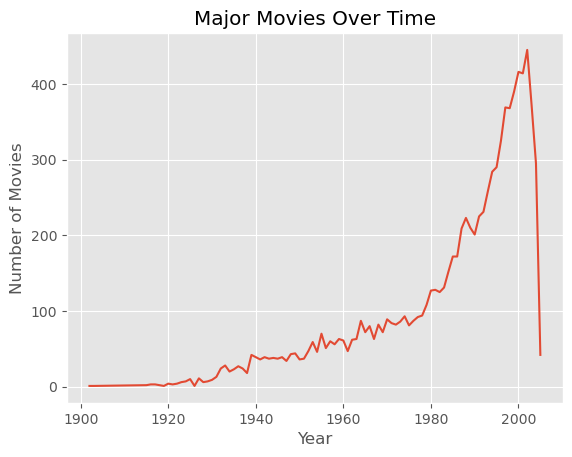

In [195]:
plt.plot(movies_per_year['year'], movies_per_year['number of movies'])
plt.title('Major Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

### Task 2.10: Yearly average

Compute the average number of votes per year for all major movies.  
Use the numbers you computed to plot a line chart. Plot the year on the x-axis and the average number of votes on the y axis.  

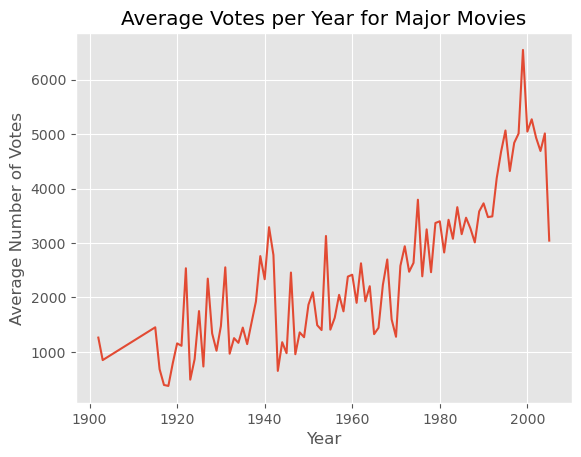

In [200]:
average_votes_per_year = major_movies_df.groupby("year")["votes"].mean().reset_index(name='average votes')

plt.plot(average_votes_per_year['year'], average_votes_per_year['average votes'])
plt.title('Average Votes per Year for Major Movies')
plt.xlabel('Year')
plt.ylabel('Average Number of Votes')
plt.grid(True)
plt.show()

### Task 2.11: Explore and Interpret

Are old movies better? How could you explain this? 

Is 250 votes a good threshhold for the title 'major' movie?

Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of votes per year, the average number of votes for a movie in a particular year, etc. 

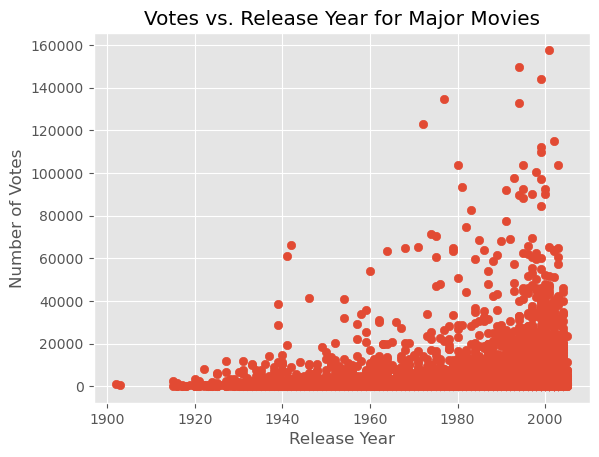

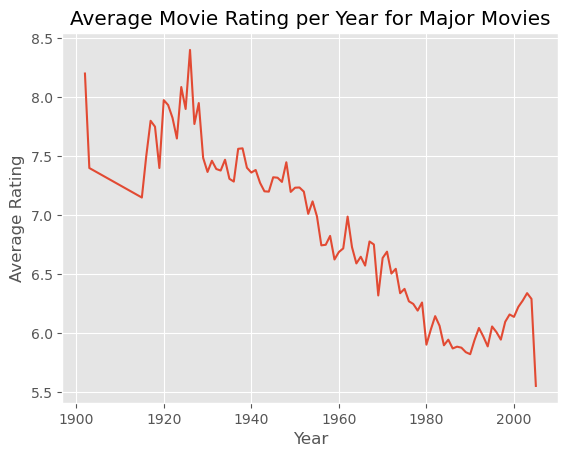

In [209]:

plt.scatter(major_movies_df['year'], major_movies_df['votes'])
plt.title('Votes vs. Release Year for Major Movies')
plt.xlabel('Release Year')
plt.ylabel('Number of Votes')
plt.grid(True)
plt.show()


average_rating_per_year = major_movies_df.groupby("year")["rating"].mean().reset_index(name='average rating')


plt.plot(average_rating_per_year['year'], average_rating_per_year['average rating'])
plt.title('Average Movie Rating per Year for Major Movies')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

The fact that the average goes down over the years is becuase more movies are being rated by a bigger audience. The dataset has an upward trend in the number of votes cast over the years. This trend is probably a result of the increase accessibility and popularity of movies. an increase in the Major Movie threshold would result in excluding older movies, which would create a more balanced trend in the data.
